# Charting SP 500

## Settings

In [86]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('default')
#plt.style.use(['ggplot'])
#plt.style.use(['ggplot','my_custom_style'])
#plt.style.use('default')


In [87]:
config_file = mpl.matplotlib_fname()
print(f"Configuration File Path: {config_file}")

print('\n')
config_dir = mpl.get_configdir()
print(f"Configuration Directory Path: {config_dir}")

Configuration File Path: c:\Users\awaul\anaconda3\envs\a_python\lib\site-packages\matplotlib\mpl-data\matplotlibrc


Configuration Directory Path: C:\Users\awaul\.matplotlib


In [88]:
fonts = mpl.font_manager.get_font_names()
if 'DejaVu Serif' in fonts:
    print('DejaVu Serif is available.')
else:
    print('DejaVu Serif is not available.')


DejaVu Serif is available.


## Import Data

In [89]:
spx_data = pd.read_csv("../../data/spx.csv")
spx_data.head()

,Date,Open,High,Low,Close
0,1/27/2023,4053.72,4094.21,4048.70,4070.56
1,1/26/2023,4036.08,4061.57,4013.29,4060.43
2,1/25/2023,3982.71,4019.55,3949.06,4016.22
3,1/24/2023,4001.74,4023.92,3989.79,4016.95
4,1/23/2023,3978.14,4039.31,3971.64,4019.81


In [90]:
spx_data.info()
print('\n')
print(spx_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    270 non-null    object 
 1    Open   270 non-null    float64
 2    High   270 non-null    float64
 3    Low    270 non-null    float64
 4    Close  270 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.7+ KB


Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')


## Clean Column Names

Remove the leading space from column names.

In [91]:
spx_data.rename(columns=lambda x: x.strip(), inplace=True)
print(spx_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


## Change Data Type for Date
Change the date column from object to datetime data.

In [92]:
spx_data['Date'] = pd.to_datetime(spx_data['Date'])
print(spx_data['Date'].dtype)

datetime64[ns]


## Line Chart Data

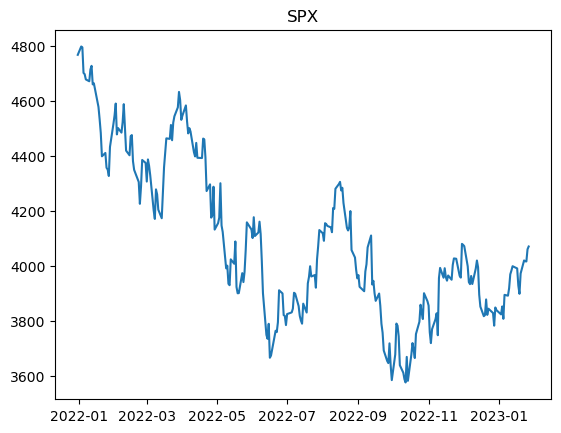

In [93]:
# Basic Line Plot with Default Settings - Pyplot
plt.plot(spx_data.Date, spx_data.Close)
plt.title('SPX')
plt.show()

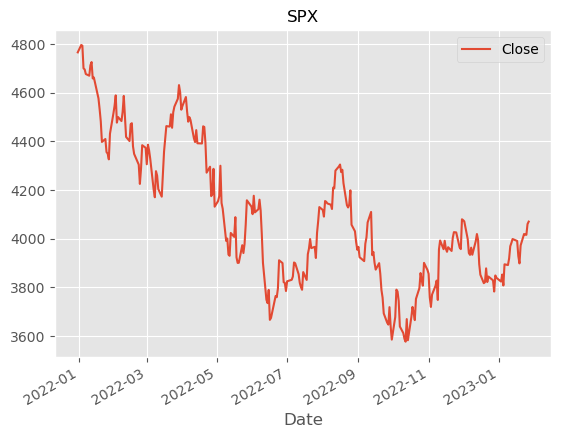

In [94]:

with plt.style.context('ggplot'):
    spx_data.plot.line('Date','Close')
plt.title('SPX')
# Create a Watermark on Chart
# plt.text(0.5, 0.5, 'Strictly Speaking', fontsize=40, color='white',rotation=30,
# ha='center', va='center', alpha=0.35, transform=plt.gcf().transFigure)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.show()


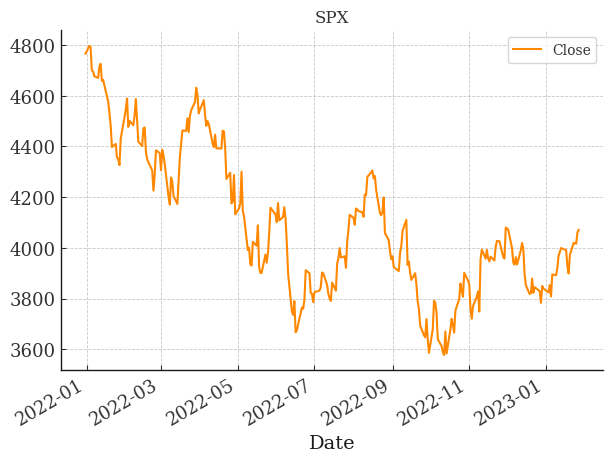

In [95]:
with plt.style.context('my_custom_style'):
    spx_data.plot.line('Date','Close')
plt.title('SPX')
plt.show()

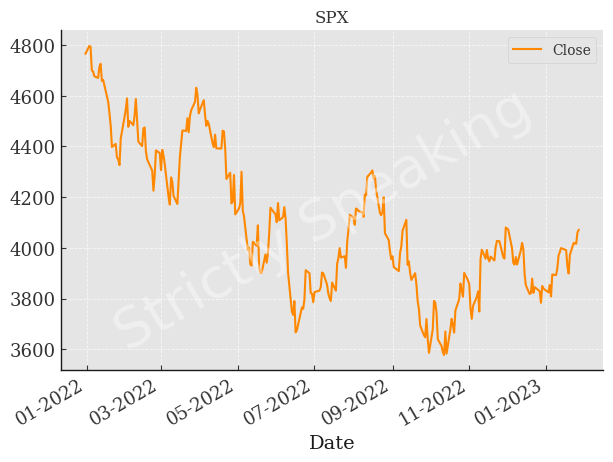

In [96]:
# Create a Watermark on Chart

a = ['ggplot','my_custom_style']

with plt.style.context(a):
    spx_data.plot.line('Date','Close')
plt.text(0.5, 0.5, 'Strictly Speaking', fontsize=40, color='white',rotation=30,
ha='center', va='center', alpha=0.40, transform=plt.gcf().transFigure)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.title('SPX')
plt.show()

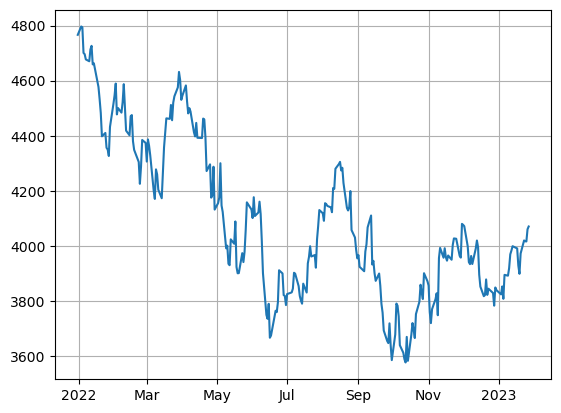

In [97]:
fig, ax = plt.subplots()
ax.plot(spx_data.Date,spx_data.Close)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
#ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,6)))
#ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(True)
plt.show()

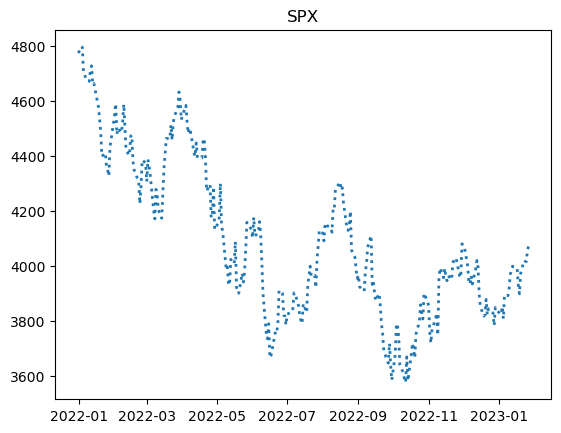

In [98]:
# Temporary rcparams example

with mpl.rc_context({'lines.linewidth': 2, 'lines.linestyle': ':'}):
        plt.plot(spx_data.Date, spx_data.Close)
plt.title('SPX')
plt.show()

## Scatter Plots

In [99]:
# Generate Random Data for Sample Scatter Plot
np.random.seed(0)
array_one = np.random.normal(0, 1, 100)
array_two = np.random.normal(0, 1, 100)

a_DF = pd.DataFrame({'Array_1': array_one, 'Array_2':array_two})

a_DF.head(2)

,Array_1,Array_2
0,1.764052,1.883151
1,0.400157,-1.347759


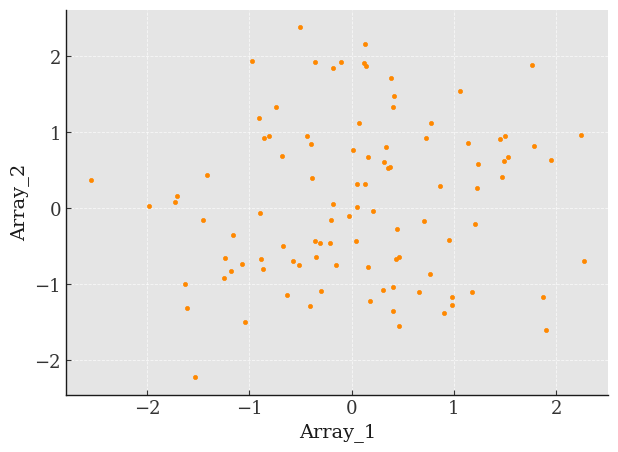

In [100]:
combined = ['ggplot','my_custom_style']

with plt.style.context(combined):
    plt.scatter(a_DF.Array_1, a_DF.Array_2)
plt.xlabel('Array_1')
plt.ylabel('Array_2')
plt.show()

### Correlations

In [101]:
# Calculate the correlation of the two data sets
a_DF['Array_1'].corr(a_DF['Array_2'])

0.1117291988189485

## Relational Plots (Multivariate)

In [102]:
housing = pd.read_csv("../../data/housing.csv")
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Year,Rooms
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,215000,1999 or older,7 rooms or more
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,MnPrv,NaN,0,6,2010,WD,Normal,105000,1999 or older,6 rooms or less
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,Gar2,12500,6,2010,WD,Normal,172000,1999 or older,6 rooms or less
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,244000,1999 or older,7 rooms or more
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,MnPrv,NaN,0,3,2010,WD,Normal,189900,1999 or older,6 rooms or less


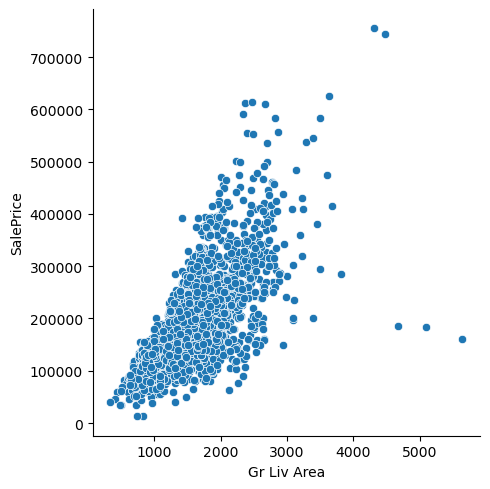

In [103]:
import seaborn as sns
sns.relplot(data = housing, x = "Gr Liv Area", y = "SalePrice")
plt.show()

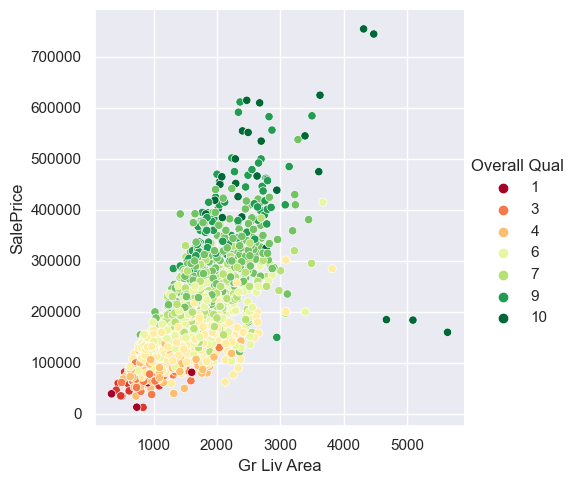

In [104]:
sns.set_theme()
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette = 'RdYlGn')
plt.show()

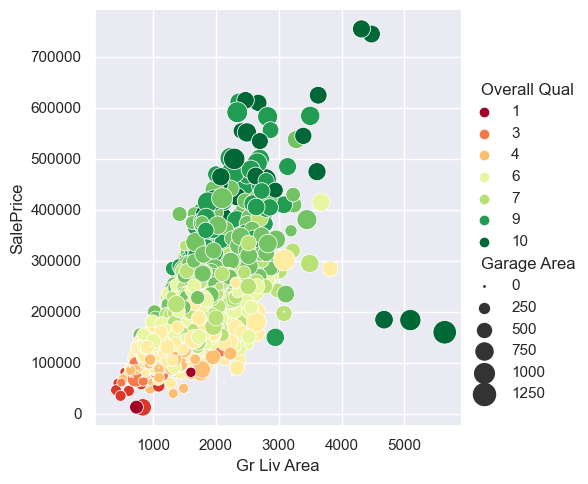

In [105]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300))
plt.show()

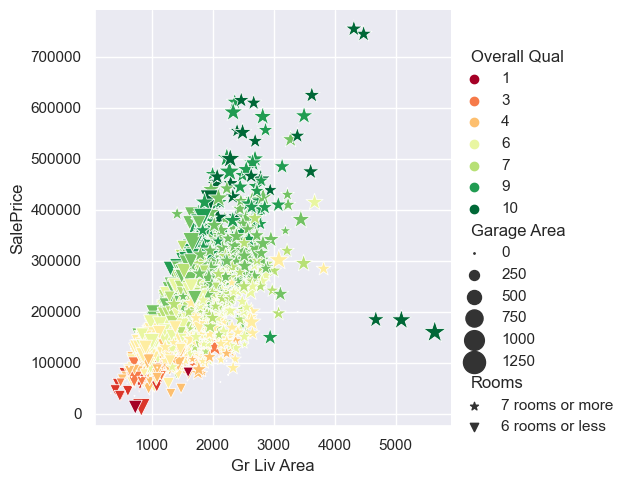

In [106]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms', markers=['*','v'])
plt.show()